# Mask Generation with OpenCV
In the paper they generate irregular masks by using occlusion/dis-occlusion between two consecutive frames of videos, as described in [this paper](https://lmb.informatik.uni-freiburg.de/Publications/2010/Bro10e/sundaram_eccv10.pdf). 

Instead we'll simply be using OpenCV to generate some irregular masks, which will hopefully perform just as well. We've implemented this in the function `_generate_mask`, which is located in the `util.py` file in the libs directory

In [1]:
import os
import itertools
import matplotlib
import matplotlib.pyplot as plt

# Change to root path
if os.path.basename(os.getcwd()) != 'PConv-Keras':
    os.chdir('..')
    
# Import function that generates random masks
from libs.util import MaskGenerator

%matplotlib inline

Let us review of the code of this function

In [2]:
??MaskGenerator._generate_mask

Let's create some output samples with this function to see what it does

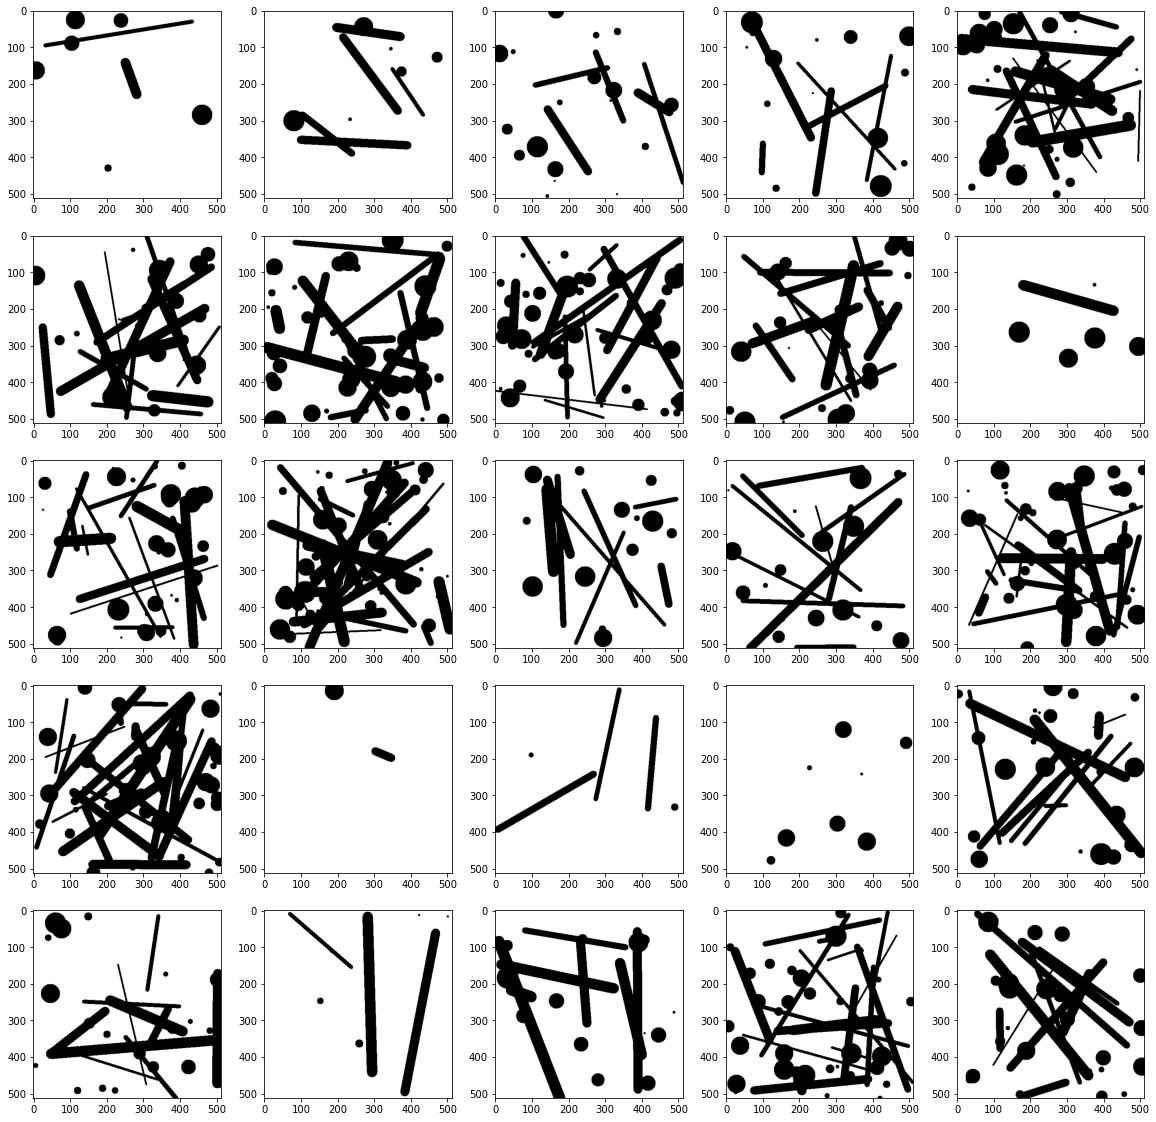

In [3]:
# Instantiate mask generator
mask_generator = MaskGenerator(512, 512, 3, rand_seed=42)

# Plot the results
_, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = list(itertools.chain.from_iterable(axes))

for i in range(len(axes)):
    
    # Generate image
    img = mask_generator.sample()
    
    # Plot image on axis
    axes[i].imshow(img*255)

I've also implemented a function which will load masks from a directory, and potentially augments them. This can be used to load masks published with the original paper. E.g. get the original training and testing masks from https://nv-adlr.github.io/publication/partialconv-inpainting, and save them to `data/masks/train/` and `data/masks/test/`, respectively.

>> Found 12000 masks in ./data/masks/test


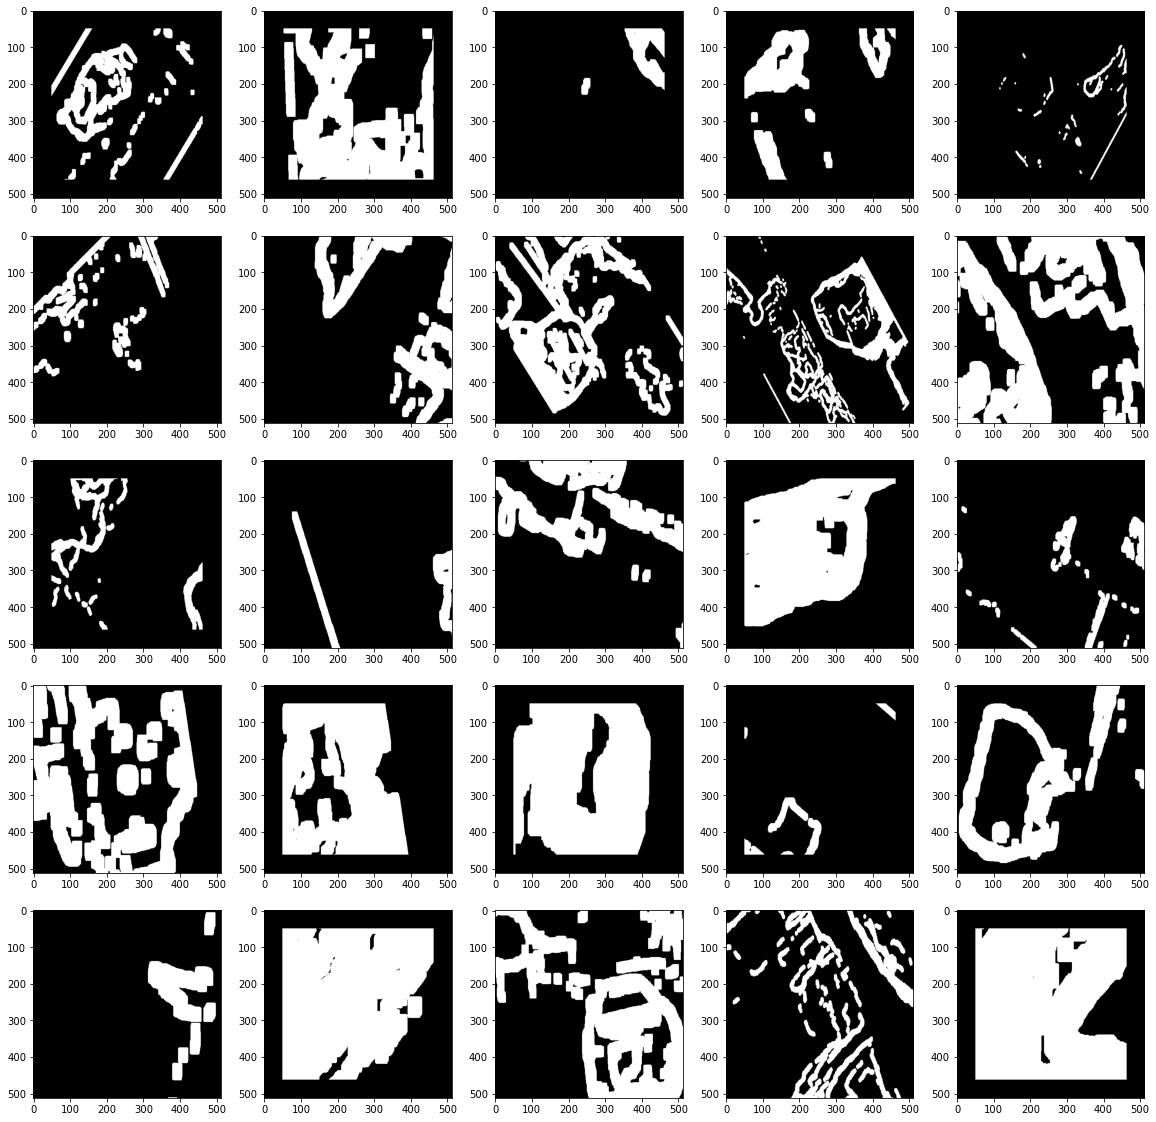

In [4]:
# Instantiate mask generator
mask_generator = MaskGenerator(
    512, 512, 3, rand_seed=42, filepath='./data/masks/test', 
    rotation=False, dilation=False, cropping=False
)

# Plot the results
_, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = list(itertools.chain.from_iterable(axes))

for i in range(len(axes)):
    
    # Generate image
    img = mask_generator.sample()
    
    # Plot image on axis
    axes[i].imshow(img*255)

# Random Mask Hole Ratio Distribution

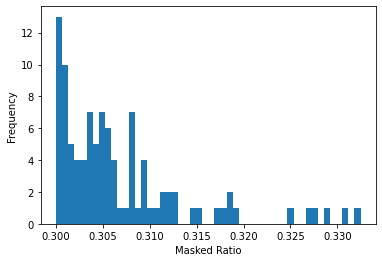

In [6]:
# Instantiate mask generator
mask_generator = MaskGenerator(512, 512, 3, rand_seed=42, invert=True, target_ratio=0.3)

# Create 10k random masks
ratios = [mask_generator.sample().sum() / (512*512*3) for _ in range(100)]

# Show the masks
plt.hist(ratios, bins=50)
plt.xlabel('Masked Ratio')
plt.ylabel('Frequency')
plt.show()

# Mask with target ratio